# INTRODUCTION

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize. Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”. Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

I will be analysing a dataset on the past winners of the Nobel Prize, in other to see patterns that can be uncover in the past Nobel laureates and what can be learnt about the Nobel prize and our world more generally.

### LOAD THE LIBRARIES

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

### LOAD THE DATA

In [128]:
data = pd.read_csv('sample_data/nobel_prize_data.csv') 

In [129]:
data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### EXPLORE THE DATA

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**How many missing values are in each column?**

In [131]:
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [132]:
# Filtering on the NaN values in the birth date
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
data.loc[data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In [133]:
# looking at rows where organiztion is NaN
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
missing_org = data.loc[data.organization_name.isna()][col_subset]
missing_org.shape

(255, 5)

In [134]:
# missing_org data
missing_org

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


Seems majority of the records with missing organization belong to the Peace and Literature category. There are other categories.

In [135]:
# rows with missing organization where category is not peace and literature
missing_org.query("category != 'Literature' and category != 'Peace'")

,year,category,laureate_type,full_name,organization_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska",NaN
440,1974,Economics,Individual,Friedrich August von Hayek,NaN
441,1974,Economics,Individual,Gunnar Myrdal,NaN
627,1993,Chemistry,Individual,Kary B. Mullis,NaN
705,1999,Physics,Individual,Martinus J.G. Veltman,NaN
721,2001,Chemistry,Individual,William S. Knowles,NaN
777,2005,Medicine,Individual,J. Robin Warren,NaN


In addition, when i looked at rows where the `organization_name` column has no value (255 missing values), it's seen that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

**Change the date type from int to datetime.**

In [136]:
data.birth_date = pd.to_datetime(data.birth_date)

Adding a column that contains the percentage share as first requires that we split the string on the forward slash. Then we can convert to a number. And finally, we can do the division.



In [137]:
separated_values = data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
data['share_pct'] = numerator / denomenator

**How many prizes went to men and how many prizes went to women? Representing this with a chart.**

In [138]:
biology = data.sex.value_counts()
biology

Male      876
Female     58
Name: sex, dtype: int64

In [139]:
biology = data.sex.value_counts()
fig = px.pie(labels=biology.index, 
             values=biology.values,
             title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

**Who were the first three women to win the Nobel Prize?**

In [140]:
data[data.sex == 'Female'].sort_values('year', ascending=True)[:3]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


**Did some people get a Nobel Prize more than once? If so, who were they?**

In [141]:
data[data.duplicated('full_name', keep=False)][['year', 'category', 'laureate_type', 'full_name']]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.

**Number of each unique categories that are there in the data?** 

In [142]:
prizes_per_category = data.category.value_counts()
prizes_per_category 

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [143]:
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

In [144]:
data[data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.5
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.0


The chart above begs the question: "Why are there so few prizes in the field of economics?". Looking at the first couple of winners in the economics category, we have our answer:

The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.

**Visually representing the number on male and female winners for each categories.**

In [145]:
cat_men_women = data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})

In [146]:
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [147]:
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [148]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace. Splitting bar charts like this is an incredibly powerful way to show a more granular picture.

**Are more prizes awarded recently than when the prize was first created?**

In [149]:
# calculating the number of entries per year
prize_per_year = data.groupby(by='year').count().prize 
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [150]:
# smoothing the data by taking a rolling average of the data.
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     6.2
        ... 
2016    11.6
2017    12.0
2018    12.0
2019    12.2
2020    12.4
Name: prize, Length: 117, dtype: float64

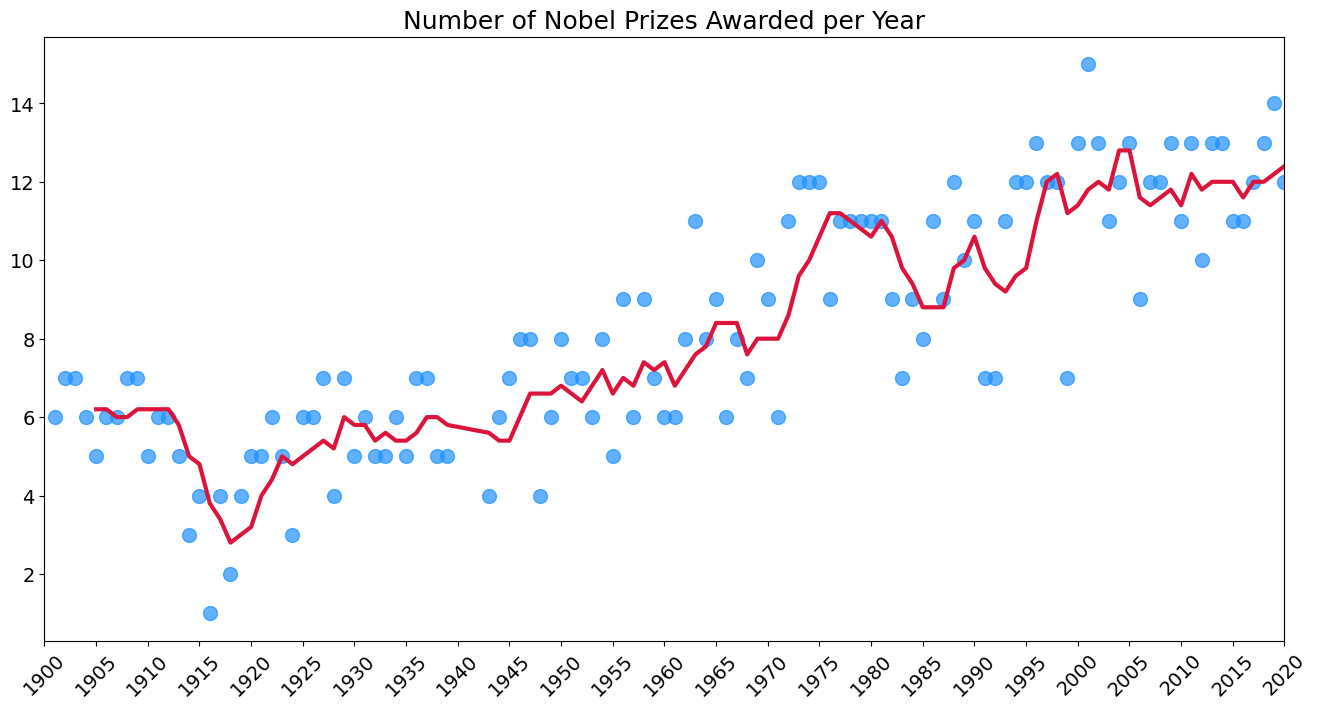

In [151]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

**Now we can work out the rolling average of the percentage share of the prize.** 

If more prizes are given out, perhaps it is because the prize is split between more people.

In [152]:
yearly_avg_share = data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

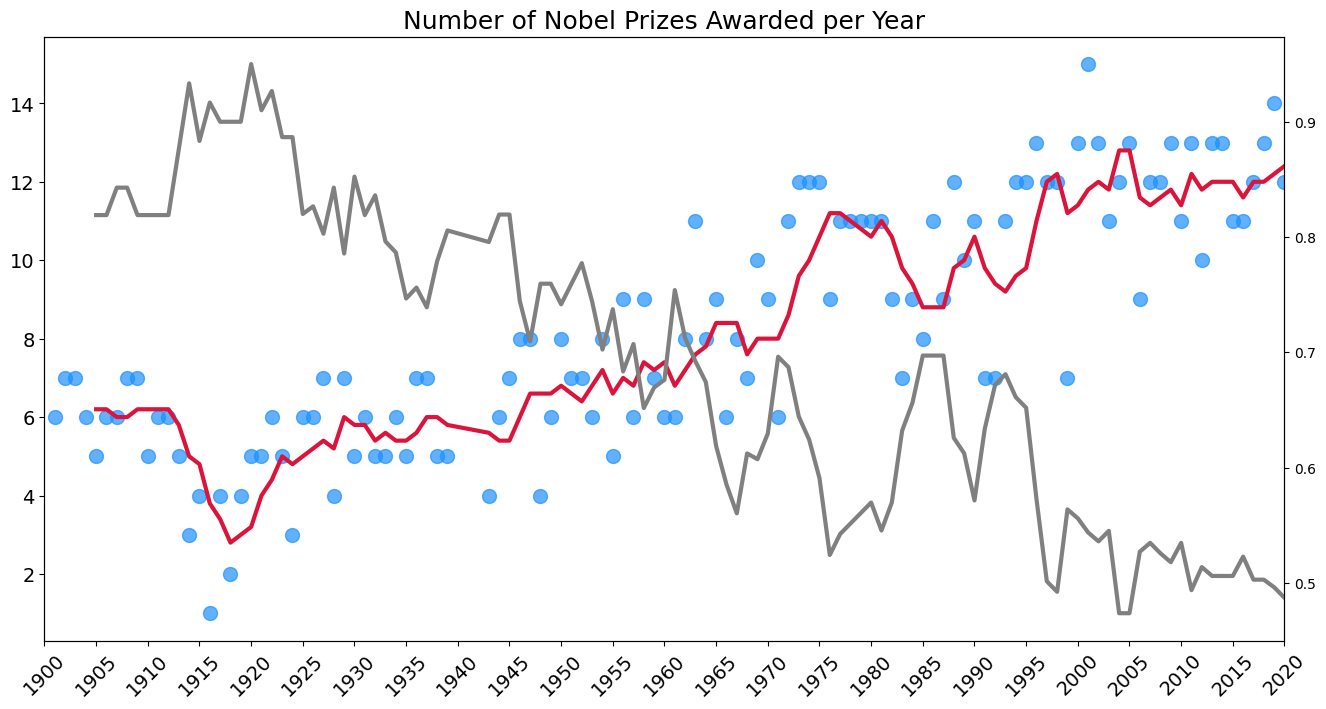

In [153]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

To see the **relationship** between the number of prizes and the laureate share even more clearly we can invert the second y-axis.

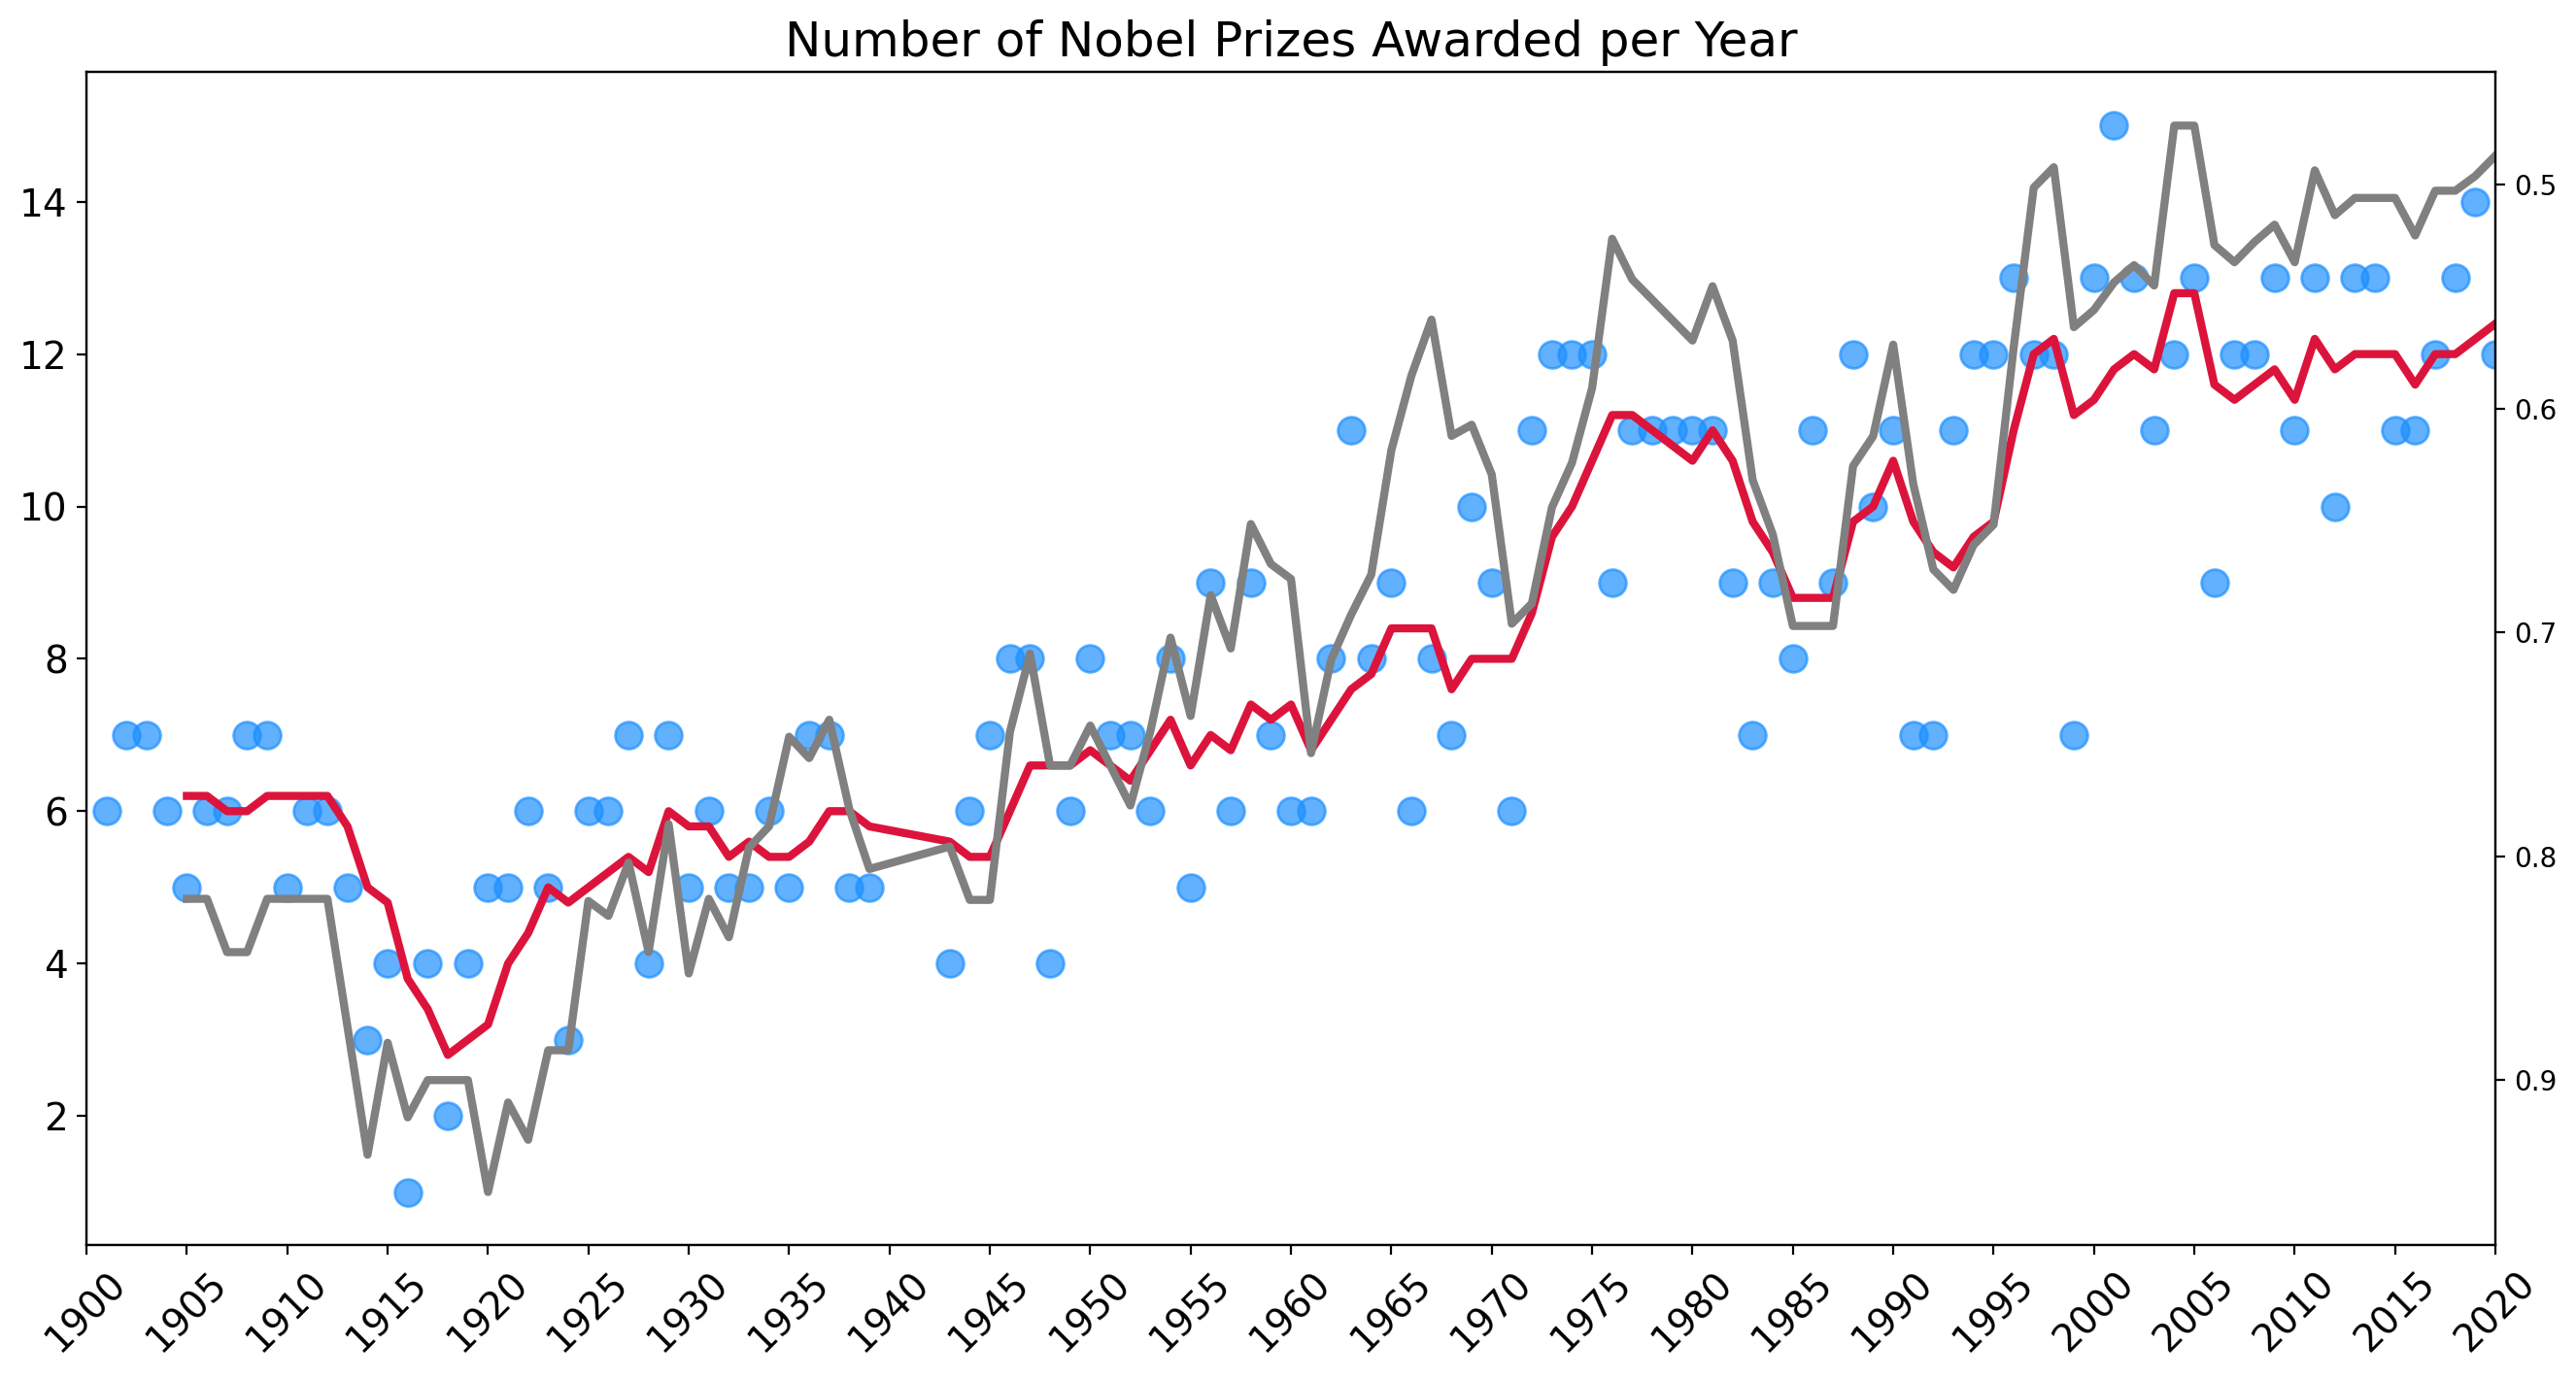

In [154]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.



**Which countries actually get the most prizes and which categories those prizes are awarded?**

Looking at the DataFrame there are actually 3 different columns to choose from for creating this ranking: birth_country, birth_country_current or organization_country. However, they each have certain problems and limitations.

If you look at the entries in the birth country, you'll see that some countries no longer exist! These include the Soviet Union or Czechoslovakia for example. Hence, using birth_country_current is better, since it has the country name which controls the city where the laureate was born. 

Now, notice that this does not determine the laureates' nationality since some globetrotting folks gave birth to their future Nobel laureate children while abroad. Also, people's nationalities can change as they emigrate and acquire different citizenship or get married and change citizenship.

In [155]:
top_countries = data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)

In [156]:
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [157]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

To show the above ranking on a colour coded map, we need to make use of the ISO codes.

In [158]:
df_countries = data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})

In [159]:
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [160]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

**What is the category breakdown by country?**

In [161]:
cat_country = data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [162]:
cat_country


,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


Next, we can merge the DataFrame above with the top20_countries DataFrame that we created previously. That way we get the total number of prizes in a single column too. This is important since we want to control the order for our bar chart.



In [163]:
top20_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 7 to 74
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   birth_country_current  20 non-null     object
 1   prize                  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [164]:
cat_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 204 to 210
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   birth_country_current  211 non-null    object
 1   category               211 non-null    object
 2   prize                  211 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


In [165]:
# use intersection of birth_country_current value in both df to join them
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

In [166]:
print(merged_df.shape)
merged_df

(110, 4)


,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


Now i will create the bar chart again. This time i use the color parameter based on the category.

In [167]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()


It is seen that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. 

On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

**Country Prizes over Time: how the prize was awarded over time?**

In [168]:
prize_by_year = data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [169]:
prize_by_year.head(10)

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
313,1902,Netherlands,2
236,1902,India,1
160,1902,Germany,2
441,1902,Switzerland,2
467,1903,United Kingdom,1


In [170]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [171]:
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [172]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current',
                  title='Country Prizes over Time')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias?

Many Nobel laureates are affiliated with a university, a laboratory, or a research organisation (apart from Literature and Peace prize winners as we've seen). But the world is a big place. 

**Which research institutions had the most Nobel laureates working there at the time of making the discovery?**

In [173]:
org_count = data.organization_name.value_counts(ascending=True)
org_count

National Research Council of Canada             1
US Naval Research Laboratory                    1
Center for Study of Public Choice               1
Institute of Cell Biology of the C.N.R.         1
Du Pont                                         1
                                               ..
University of Chicago                          20
Massachusetts Institute of Technology (MIT)    21
Stanford University                            23
Harvard University                             29
University of California                       40
Name: organization_name, Length: 264, dtype: int64

In [174]:
org_bar = px.bar(x=org_count[-20:].values,
           y=org_count[-20:].index, 
           orientation='h', 
           title='Research Institutions With The Most Nobel Laureates ')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)

org_bar.show()

University of Chicago and Harvard Uniersity have the highest number of Nobel Laureate of size 40 and 29 respectively.

**What are the top 20 organisation cities of the research institutions associated with a Nobel laureate?**

In [175]:
org_city = data.organization_city.value_counts(ascending=True)
org_city

Edmonton          1
Canberra          1
Mülheim/Ruhr      1
Milan             1
Melbourne         1
                 ..
Paris            25
London           27
Cambridge        31
New York, NY     45
Cambridge, MA    50
Name: organization_city, Length: 187, dtype: int64

In [176]:
org_city_bar = px.bar(x=org_city[-20:].values,
                      y=org_city[-20:].index,
                      title='Top 20 Organisation Cities WIth Research')

org_city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)

org_city_bar.show()

**Where were the Nobel Laureates Born?**

In [177]:
top20_cities = data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

**Create a DataFrame that groups the number of prizes by organisation.**

In [178]:
country_city_org = data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], 
                                as_index=False).agg({'prize': pd.Series.count})

In [179]:
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [180]:
country_city_org.head(20)

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
163,United Kingdom,Cambridge,University of Cambridge,18
248,United States of America,"New York, NY",Columbia University,17
255,United States of America,"Pasadena, CA",California Institute of Technology (Caltech),17
260,United States of America,"Princeton, NJ",Princeton University,15
252,United States of America,"New York, NY",Rockefeller University,13


Each country has a number of cities, which contain a number of cities, which in turn contain the research organisations. The sunburst chart is perfect for representing this relationship. It will give us an idea of how geographically concentrated scientific discoveries are!

In [181]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

**How old are the Nobel laureates at the time when they win the prize? Does this vary by category? Also, how has the age of the laureates changed over time?**

In [182]:
# calculate the age of the laureate in the year of the ceremony:
birth_years = data.birth_date.dt.year
data['winning_age'] = data.year - birth_years

Oldest and Youngest Winners:

In [183]:
# data.loc[data.winning_age.idxmax()]
display(data.nlargest(n=1, columns='winning_age'))
display(data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


Distribution of the winning age:

In [184]:
data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

75% ow the winners were 69 or less years old

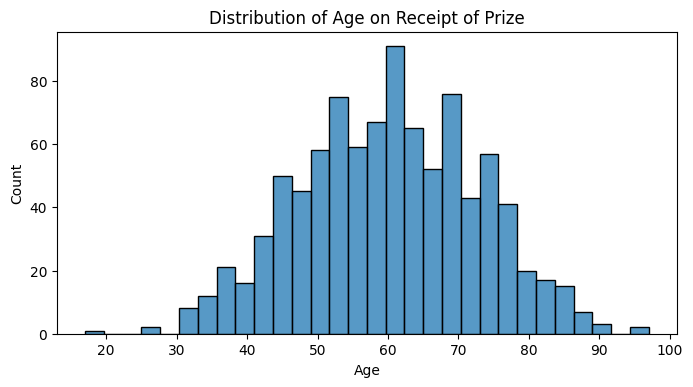

In [185]:
plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(data=data,
             x=data.winning_age,
             bins=30)

plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

The histogram above shows us the distribution across the entire dataset, over the entire time period. But perhaps the age has changed over time.

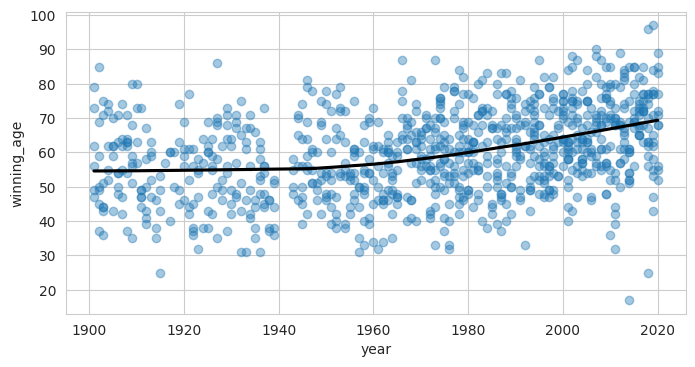

In [186]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.regplot(data=data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

Age Differences between Categories:

In [187]:
category_mean_age = data.groupby('category', as_index=False).agg({'winning_age': pd.Series.mean})[['category', 'winning_age']]

In [188]:
category_mean_age

,category,winning_age
0,Chemistry,58.817204
1,Economics,66.965116
2,Literature,64.794872
3,Medicine,58.581081
4,Peace,60.897196
5,Physics,56.439815


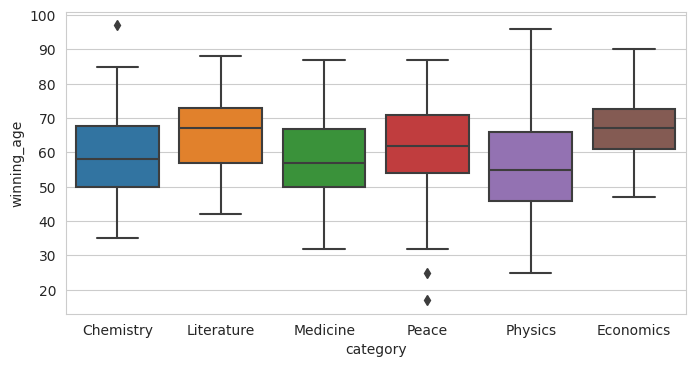

In [189]:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=data,
                x='category',
                y='winning_age')

Laureate Age over Time by Category:

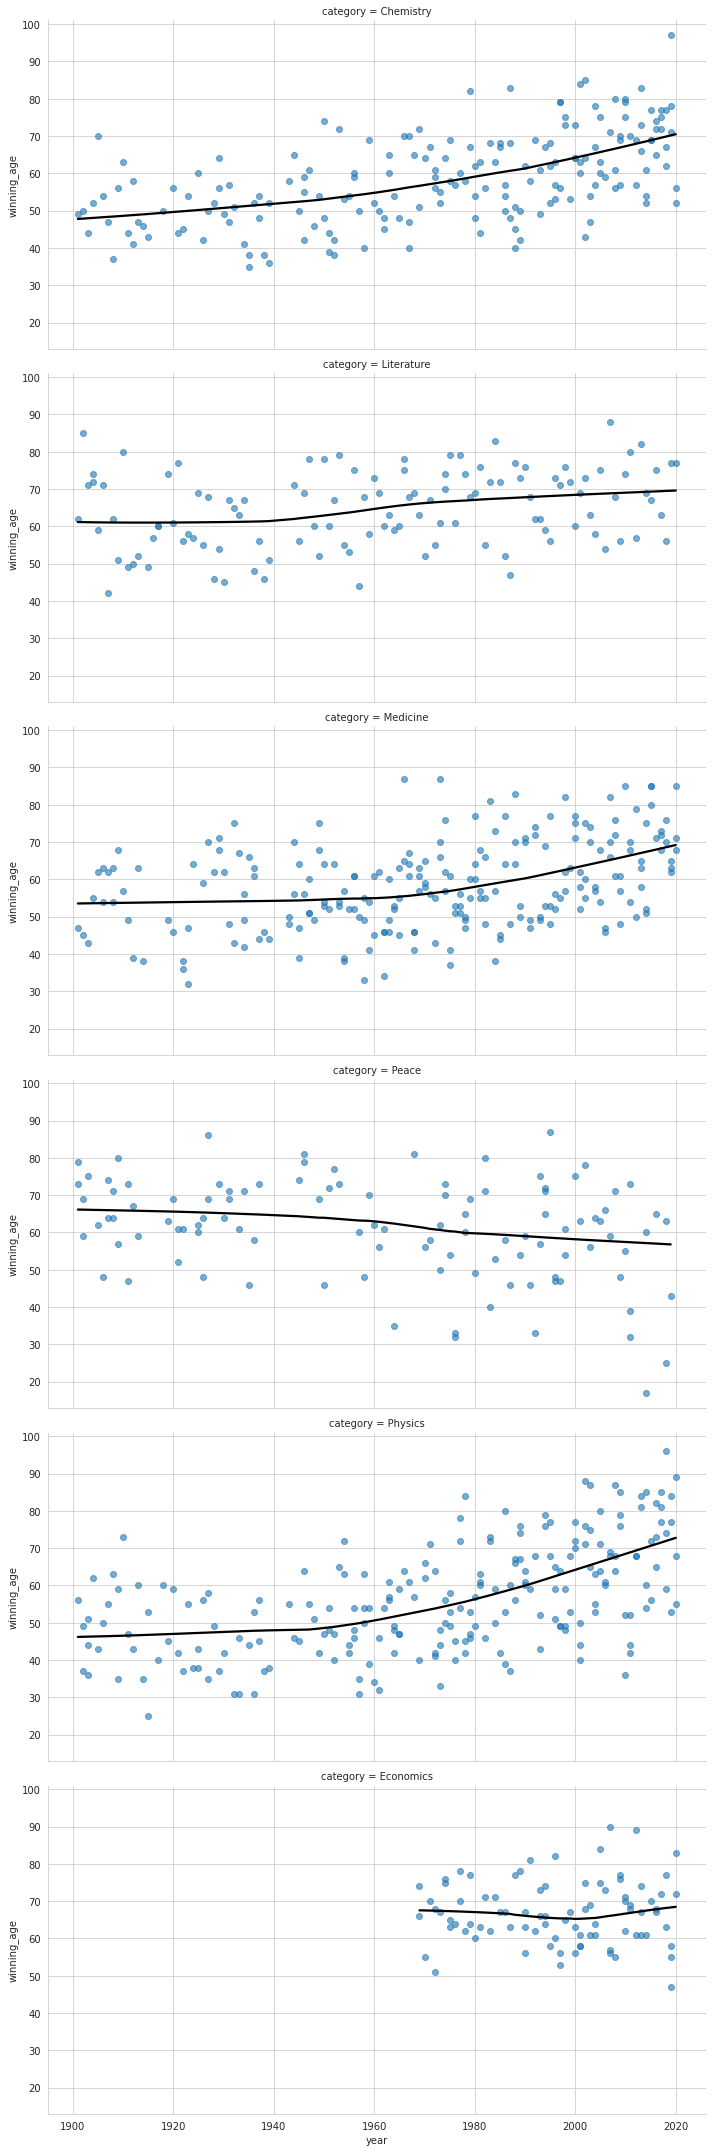

In [190]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70.

Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!

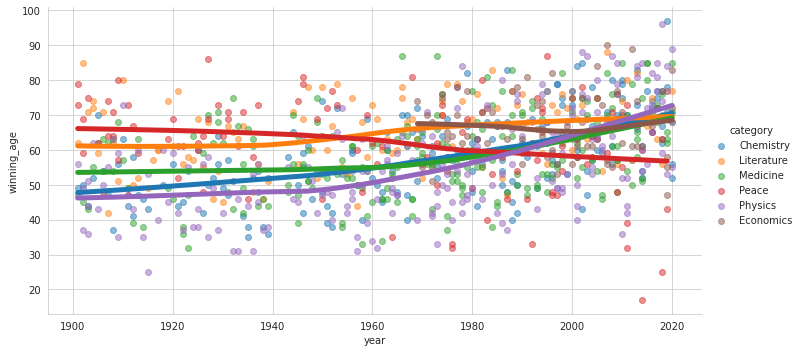

In [191]:
#  combining all of the plot together
with sns.axes_style("whitegrid"):
    sns.lmplot(data=data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()